# 数据预处理

In [23]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

In [25]:
np.random.seed(1234)

In [43]:
(x_train, _),(x_test, y_test) = mnist.load_data()

In [44]:
x_train = x_train.astype("float32") / 255 - 0.5
x_test = x_test.astype("float32") / 255 - 0.5
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape(x_test.shape[0], -1)

In [28]:
x_train[:5]

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]], dtype=float32)

# 建立模型

In [29]:
from keras.models import Model
from keras.layers import Dense, Input

## 在二维平面展示

In [30]:
encoding_dim = 2
input_img = Input(shape=(784, ))

## encode layers

In [31]:
encoder = Dense(128, activation="relu")(input_img)
encoder = Dense(64, activation="relu")(encoder)
encoder = Dense(64, activation="relu")(encoder)
encoder_output = Dense(encoding_dim)(encoder)

## decode layers

In [32]:
decoder = Dense(10, activation="relu")(encoder_output)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(128, activation="relu")(decoder)
decoder = Dense(784, activation="tanh")(decoder)

## 构造自编码

In [47]:
autoencoder = Model(inputs=input_img, outputs=decoder)

In [38]:
encoder = Model(inputs=input_img, outputs=encoder_output)

## 激活模型

In [39]:
autoencoder.compile(optimizer="adam", loss="mse")

## 开始训练

In [40]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0725
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0582
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0538
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0497
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0473
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0459
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0451
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0444
Epoch 9/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0441
Epoch 10/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0435
Epoch 11/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0431
Epoch 12/20
60000/60000 [===========================

## 二维展示

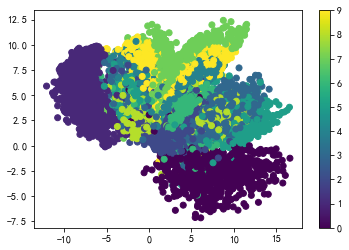

In [48]:
encoder_imgs = encoder.predict(x_test)
plt.scatter(encoder_imgs[:, 0], encoder_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()